### Importing the libraries

In [35]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(0)

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

### Getting the dataset

In [37]:
# get mnist
print("getting data...")
x_mnist, y_mnist = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
x_mnist = x_mnist.reshape(-1, 28, 28)
y_mnist = y_mnist.astype(int)

getting data...


### Check the shape of the dataset

In [38]:
print(x_mnist.shape)
print(y_mnist.shape)

(70000, 28, 28)
(70000,)


#### Split the data for training and testing

In [39]:
x_mnist_train, x_mnist_test, y_mnist_train, y_mnist_test = train_test_split(x_mnist, y_mnist, train_size=.8, shuffle=True)

In [40]:
print(x_mnist_train.shape)
print(x_mnist_test.shape)
print(y_mnist_train.shape)
print(y_mnist_test.shape)  

(56000, 28, 28)
(14000, 28, 28)
(56000,)
(14000,)


#### Visualize an image from the dataset 

7


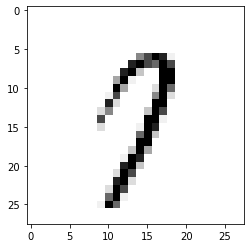

In [60]:
import matplotlib.pyplot as plt


i = 111
print(y_mnist_train[i]) 
plt.imshow(x_mnist_train[i], cmap='Greys')

#### Normalize the images of the dataset

In [42]:
x_train = x_mnist_train.reshape(x_mnist_train.shape[0], 28, 28, 1)
x_test = x_mnist_test.reshape(x_mnist_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
    

Number of images in x_train 56000
Number of images in x_test 14000


#### Model - Basic conv network 

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
    

### Train the model

In [44]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_mnist_train, epochs=15)
    

Epoch 1/15
1750/1750 [==============================] - 15s 9ms/step - loss: 0.2224 - accuracy: 0.9320
Epoch 2/15
1750/1750 [==============================] - 15s 9ms/step - loss: 0.0873 - accuracy: 0.9728
Epoch 3/15
1750/1750 [==============================] - 15s 8ms/step - loss: 0.0605 - accuracy: 0.9810
Epoch 4/15
1750/1750 [==============================] - 15s 8ms/step - loss: 0.0456 - accuracy: 0.9855
Epoch 5/15
1750/1750 [==============================] - 14s 8ms/step - loss: 0.0360 - accuracy: 0.9881
Epoch 6/15
1750/1750 [==============================] - 14s 8ms/step - loss: 0.0302 - accuracy: 0.9898
Epoch 7/15
1750/1750 [==============================] - 15s 8ms/step - loss: 0.0253 - accuracy: 0.9912
Epoch 8/15
1750/1750 [==============================] - 15s 8ms/step - loss: 0.0200 - accuracy: 0.9927
Epoch 9/15
1750/1750 [==============================] - 15s 8ms/step - loss: 0.0208 - accuracy: 0.9931
Epoch 10/15
1750/1750 [==============================] - 15s 9ms/step - l

#### Evaluate the model

In [45]:
model.evaluate(x_test, y_mnist_test)

438/438 [==============================] - 1s 3ms/step - loss: 0.0780 - accuracy: 0.9858


[0.07796843349933624, 0.985785722732544]

### Once model is working, we write a function that does the following

#### 1) Accepts images from the test set (Size - 14000 x 1)
#### 2) Makes predictions on the test set (Size - 14000 x 10) . Here output is one-hot encoded
#### 3) We take argmax to get the label with the highest probablity . (Size - 14000 x 1)
#### 4) Convert it into label-pairs (Size- 7000 x 2)
#### 5) Take the sum of digits in the label_pairs array (Size - 7000 x 1)

### Hence, we have written a function that accepts the images from the dataset, makes predictions, generates the image-pairs and returns the sum of digits in the individual pairs.

In [65]:
def compute_sum(x):
    
    print('The shape of images -' ,x.shape) 
    pred = model.predict(x)
    print('The shape of the predictions is -' , pred.shape)
    label = pred.argmax(axis=1) 
    print('The shape of the labels is -' , label.shape)
    
    ## We generate label-pairs 
    l_pairs = label.reshape(label.shape[0]//2, 2)
    print('The shape of the label pairs generated -', l_pairs.shape)
    l_sums =  np.sum(l_pairs, axis=1)
    print('The sum of the individual image label-pairs' , l_sums)
    
    return l_sums
    

In [66]:
l_sums = compute_sum(x_test) 

The shape of images - (14000, 28, 28, 1)
The shape of the predictions is - (14000, 10)
The shape of the labels is - (14000,)
The shape of the label pairs generated - (7000, 2)
The sum of the individual image label-pairs [ 4  3 16 ...  3  9 10]


### We also write a function that directly takes images from the dataset and returns their sum.

### This is the ground-truth i.e. Actual image-pairs and their corresponding sums in the test set.

In [57]:
def convert_to_sums(x, y):
    x_pairs = x.reshape(x.shape[0]//2, 2, *x.shape[-2:])
    y_pairs = y.reshape(y.shape[0]//2, 2)
    y_sums = np.sum(y_pairs, axis=1)
    
    print('The shape of the x_pairs array' , x_pairs.shape)
    print('The shape of the array of labels' , y_sums.shape) 
    print('The sum of pairs of digits in the x_pairs array is :' , y_sums)

    return x_pairs, y_sums

In [58]:
_, y_sums = convert_to_sums(x_mnist_test, y_mnist_test) 

The shape of the x_pairs array (7000, 2, 28, 28)
The shape of the array of labels (7000,)
The sum of pairs of digits in the x_pairs array is : [ 4  3 16 ...  3  9 10]


### To determine Accuracy of the model -

### - Compare the Actual sum obtained from the ACTUAL digit-pairs present in the dataset with the Sum obtained from the PREDICTED digits in the dataset

### That is we compare l_sums with y_sums

In [62]:
acc = 100*((l_sums == y_sums).sum()/l_sums.shape[0]) 
print('Accuracy of the model-' , acc) 

Accuracy of the model- 97.2


### Conclusion

### There can be multiple ways to solve this problem but I came up with this method!

#### I wrote a function that takes a pairs of images or any image from the dataset, predicts the labels, generates the label-pairs and then the corresponding sums of the pairs of digits.

#### I also wrote a function to directly take images from test set, generate the actual image-pairs and returns the corresponding sums of the pairs of digits.

#### Evaluation Accuracy of the CNN model - 98.57 %

#### Accuracy of computing sums ( When compared with the actual sums or the ground-truth) - 97.2 %